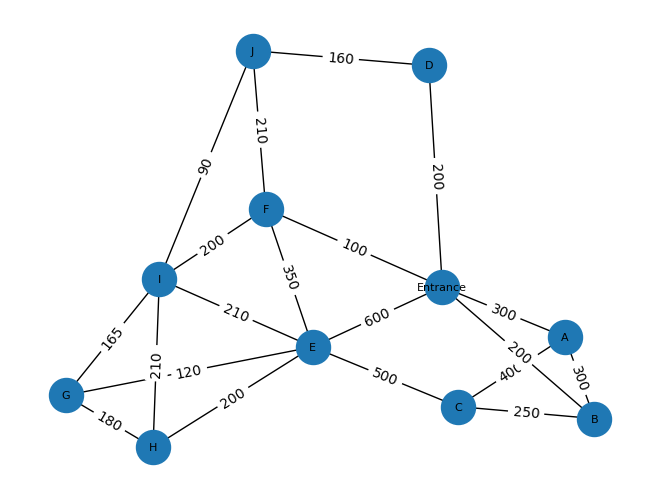

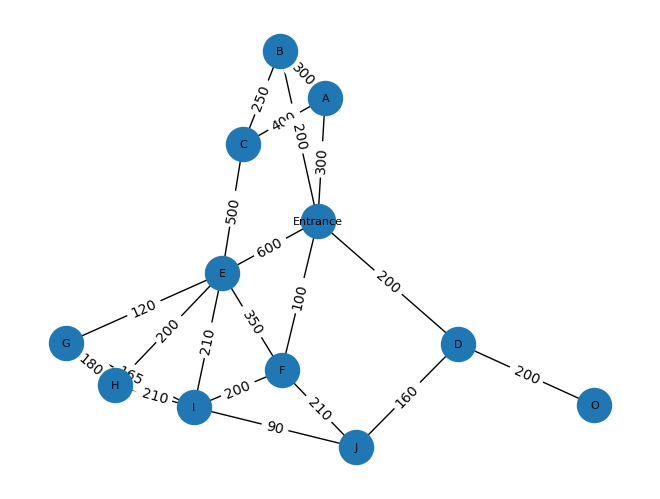

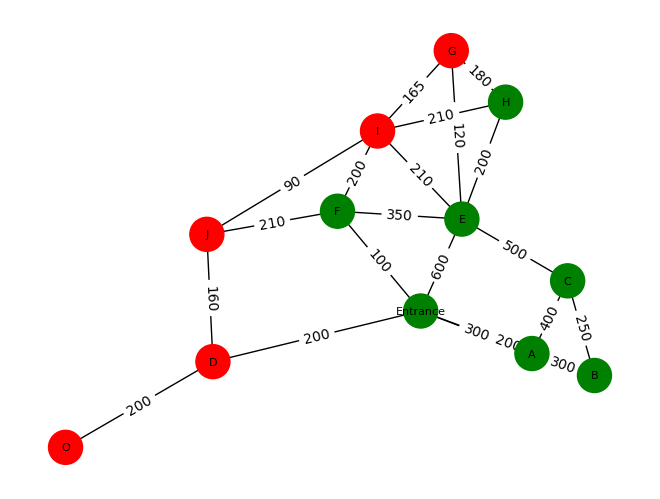

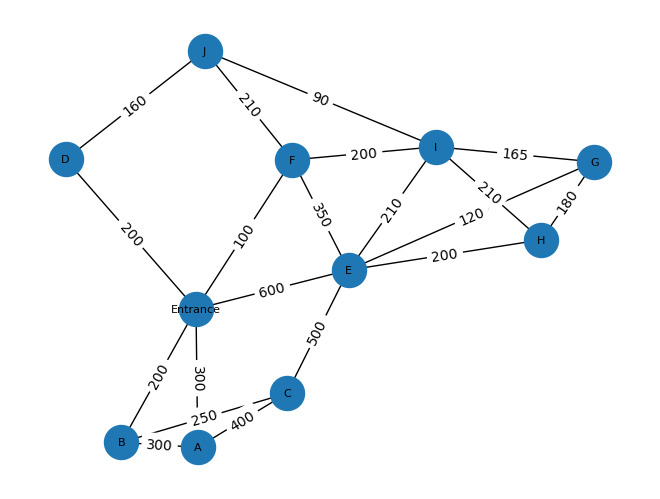

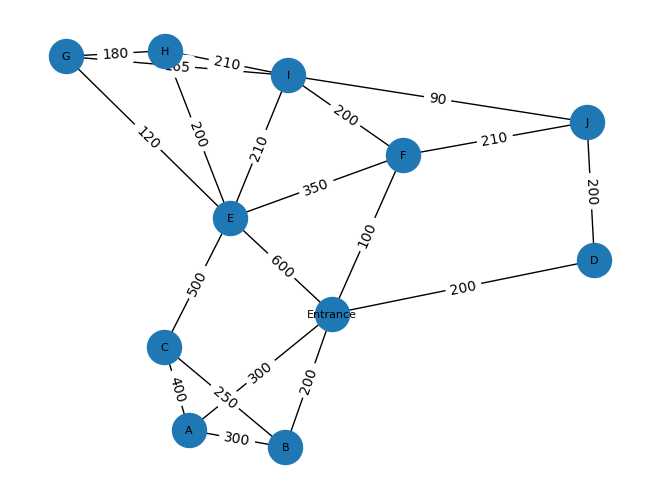

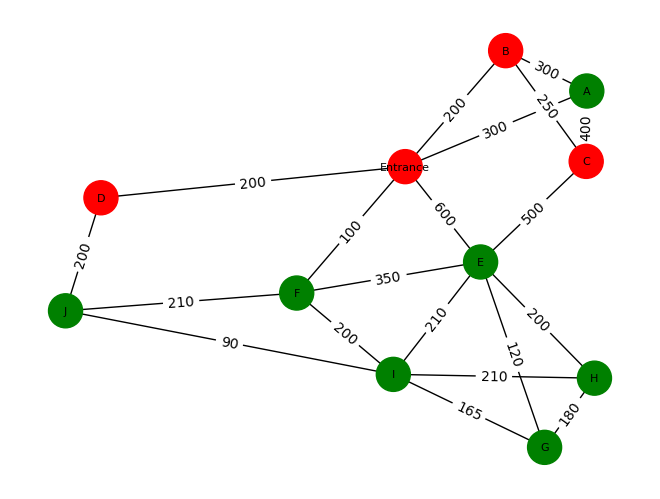

In [15]:
import tkinter as tk
from tkinter import messagebox
import networkx as nx
import matplotlib.pyplot as plt


facilities = set()
routes = {}


def add_facility():
    global facilities
    facility = facility_input.get()
    if facility:
        facilities.add(facility)
        messagebox.showinfo("添加成功", f"成功添加設施: {facility}")
        
    else:
        messagebox.showerror("錯誤", "請輸入設施名稱")
        

def add_route():
    global routes
    from_where_add = from_where.get()
    to_where_add = to_where.get()
    distance = distance_input.get()

    if from_where_add and to_where_add and distance:
        routes[(from_where_add, to_where_add)] = distance
        messagebox.showinfo("添加成功","路徑添加成功")
    else:
        messagebox.showerror("錯誤", "請輸入有效的路徑和距離")
        

def built_in_map():
    built_in_facilities = {'Entrance', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}
    facilities.update(built_in_facilities)
    
    built_in_routes = {
        ('Entrance', 'A'): '300',
        ('Entrance', 'B'): '200',
        ('A', 'B'): '300',
        ('A', 'C'): '400',
        ('B', 'C'): '250',
        ('Entrance', 'F'): '100',
        ('F', 'E'): '350',
        ('E', 'G'): '120',
        ('G', 'H'): '180',
        ('G', 'I'): '165',
        ('H', 'I'): '210',
        ('I', 'J'): '90',
        ('J', 'D'): '160',
        ('J', 'F'): '210',
        ('E', 'C'): '500',
        ('E', 'I'): '210',
        ('E', 'H'): '200',
        ('F', 'I'): '200',
        ('D', 'Entrance'): '200',
        ('E', 'Entrance'): '600'
    }
    routes.update(built_in_routes)
    

def output_map():
    global facilities, routes
    plt.clf()
    G = nx.Graph()
    for facility in facilities:
        G.add_node(facility)
    
    for route, distance in routes.items():
        from_where, to_where = route
        G.add_edge(from_where, to_where, weight=int(distance))

    pos = nx.spring_layout(G) 
    nx.draw(G, pos, node_size = 600, font_size = 8, with_labels = True)
    weights = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
    plt.show()
    
    
def shortest_path():
    global facilitis, routes
    start = starting_point.get()
    end = end_point.get()
    
    if start and end :
    
        G = nx.Graph()
        for facility in facilities:
            G.add_node(facility)
        
        for route, distance in routes.items():
            from_where, to_where = route
            G.add_edge(from_where, to_where, weight=int(distance))
            
            
        path = nx.dijkstra_path(G, source=start, target=end)
        length = nx.dijkstra_path_length(G, source=start, target=end)
            
        the_shortest_path = path[0]
        for node in path[1:] :
            the_shortest_path = the_shortest_path + "-->" +node
            
        messagebox.showinfo("最短路徑",f"從 {start} 到 {end} 的最短路徑為: {the_shortest_path} \n 總距離為:{length}")
        
        pos = nx.spring_layout(G)
        
        node_colors = []
        for node in G.nodes:
            if node in path:
                node_colors.append('red')
            else:
                node_colors.append('green')
        
        nx.draw(G, pos, node_color = node_colors, node_size = 600, font_size = 8, with_labels = True)
        edge_labels = nx.get_edge_attributes(G, "weight")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
        plt.show()
        
    else:
        messagebox.showerror("錯誤", "沒有輸入完全")
    
        
def adv_setting():
    def remove_window():
        def remove_facility():
            noneed = facility_remove.get()
            if noneed in facilities:
                facilities.discard(noneed)
                
                copy = routes.copy()
                for route in copy:
                    if noneed in route:
                        routes.pop(route)
                messagebox.showinfo("成功移除", f"移移除了 {noneed} 以及相連路徑")
                
                
                plt.clf()
                G = nx.Graph()
                for facility in facilities:
                    G.add_node(facility)
                
                for route, distance in routes.items():
                    from_where, to_where = route
                    G.add_edge(from_where, to_where, weight=int(distance))

                pos = nx.spring_layout(G) 
                nx.draw(G, pos, node_size = 600, font_size = 8, with_labels = True)
                weights = nx.get_edge_attributes(G, "weight")
                nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
                plt.show()
                
                
            else:
                messagebox.showerror("錯誤", "沒有該設施")

        remove= tk.Toplevel(adv)
        remove.title("移除設施")
        
        tk.Label(remove, text="請輸入要移除的設施名稱:").pack()
        facility_remove = tk.Entry(remove)
        facility_remove.pack()
        tk.Button(remove, text="移除", command=remove_facility).pack()
            
            
    def change_distance_window():
        def distance_length():
            global routes
            from_where_change = from_where_change_input.get()
            to_where_change = to_where_change_input.get()
            distance_to_change = distance_input.get()
            
            if distance_to_change:
                routes[(from_where_change, to_where_change)] = distance_to_change
                
                messagebox.showinfo("修改成功",f"修改成功")
                
                plt.clf()
                G = nx.Graph()
                for facility in facilities:
                    G.add_node(facility)
                
                for route, distance in routes.items():
                    from_where, to_where = route
                    G.add_edge(from_where, to_where, weight=int(distance))

                pos = nx.spring_layout(G) 
                nx.draw(G, pos, node_size = 600, font_size = 8, with_labels = True)
                weights = nx.get_edge_attributes(G, "weight")
                nx.draw_networkx_edge_labels(G, pos, edge_labels=weights)
                plt.show()
            
                
            else :
                messagebox.showerror("有地方打錯")
            
    
            
                
        change= tk.Toplevel(adv)
        change.title("修改路徑長")
            
        tk.Label(change, text="要修改的路徑為:").pack()
        tk.Label(change, text="From:").pack()
        from_where_change_input = tk.Entry(change)
        from_where_change_input.pack()
            
        tk.Label(change, text="To:").pack()
        to_where_change_input = tk.Entry(change)
        to_where_change_input.pack()
        
        tk.Label(change, text="要把長度修改為:").pack()
        distance_input = tk.Entry(change)
        distance_input.pack()
            
        tk.Button(change, text="修改", command = distance_length).pack()
            
        
    
    
    adv = tk.Toplevel(window)
    adv.title("進階功能設定")
    
    tk.Label(adv, text="進階功能設定").pack()
    
    tk.Button(adv, text="移除設施", command=remove_window).pack()
    
    tk.Button(adv, text="修改路徑長", command=change_distance_window).pack()

    
        
    

window = tk.Tk()
window.title("控制板")

tk.Label(window, text="地圖參數設定").pack()
tk.Label(window, text="添加設施:").pack()
facility_input = tk.Entry(window)
facility_input.pack()
tk.Button(window, text="添加", command=add_facility).pack()

tk.Label(window, text="添加路徑:").pack()
tk.Label(window, text="From:").pack()
from_where = tk.Entry(window)
from_where.pack()

tk.Label(window, text="To:").pack()
to_where = tk.Entry(window)
to_where.pack()

tk.Label(window, text="路徑長").pack()
distance_input = tk.Entry(window)
distance_input.pack()
tk.Button(window, text="添加路徑", command=add_route).pack()

tk.Label(window, text="   ").pack()
tk.Label(window, text="地圖顯示設置").pack()

tk.Button(window, text="使用預設地圖", command=built_in_map).pack()

tk.Button(window, text="顯示地圖", command=output_map).pack()

tk.Label(window, text="   ").pack()
tk.Label(window, text="尋找最短路徑").pack()

tk.Label(window, text="起點").pack()
starting_point = tk.Entry(window)
starting_point.pack()

tk.Label(window, text="終點").pack()
end_point = tk.Entry(window)
end_point.pack()

tk.Button(window, text="尋找最短路徑", command=shortest_path).pack()

tk.Label(window, text="   ").pack()

tk.Button(window, text="進階設定", command=adv_setting).pack()



window.mainloop()
